In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.datasets import make_blobs

/Users/hardiksharma/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Step 1 : Create clustering data using make_blobs

In [2]:
X,y = make_blobs(n_samples=1000, centers=5, n_features=2)

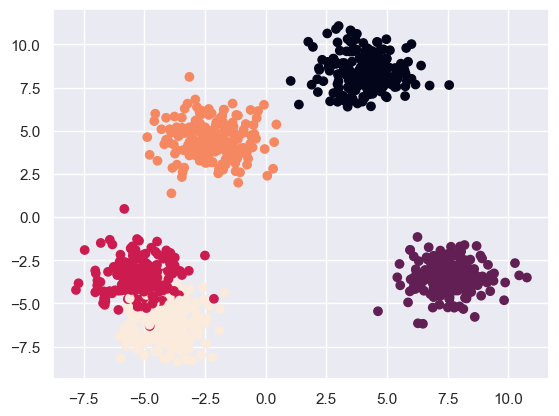

In [3]:
plt.scatter(X[:,0], X[:,1], c=y)

## Step 2 : Do train/test split and Standard scaling

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

## Step 3 : Find the number of clusters (K) using Elbow method

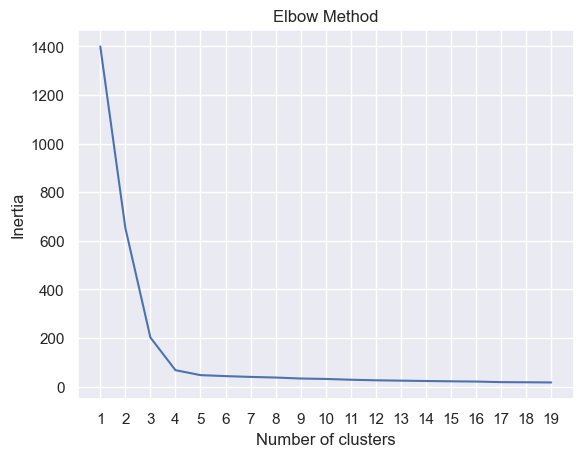

In [6]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,20):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_scaled_train)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,20),wcss)
plt.title("Elbow Method")
plt.xticks(range(1,20))
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

## Step 4 : Load the K-means model

In [7]:
kmeans = KMeans(n_clusters=4, init="k-means++")
kmeans.fit_predict(X_scaled_train)
y_pred = kmeans.predict(X_scaled_test)

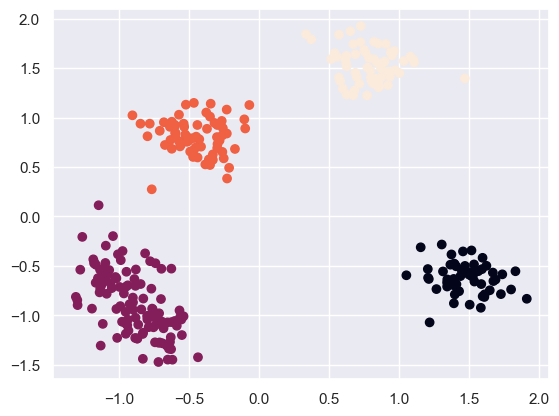

In [8]:
plt.scatter(X_scaled_test[:,0], X_scaled_test[:,1], c=y_pred)

## Step 5 : Validating our K-value using KneeLocator and Silhouette Score

In [9]:
# !pip install kneed

In [10]:
from kneed import KneeLocator
kl = KneeLocator(range(1,20), wcss, curve="convex", direction="decreasing")
kl.elbow

4

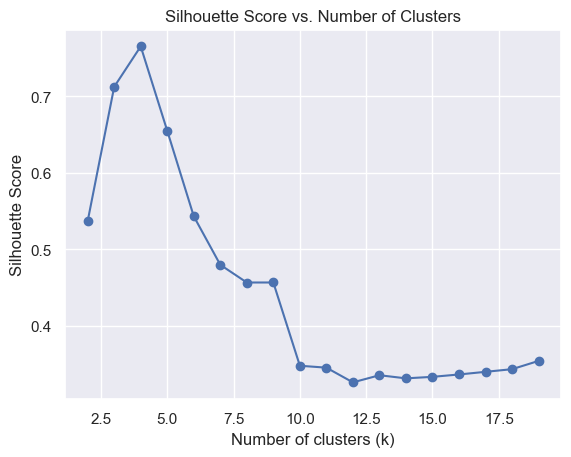

In [11]:
from sklearn.metrics import silhouette_score
silhouette_scores = [] 
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(X_scaled_train)
    score = silhouette_score(X_scaled_train, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 20), silhouette_scores, marker='o')
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()
